In [1]:
# Import the libraries we will be using
import numpy as np
import matplotlib.pyplot as plt
%timeit

# Ray Tracing in Python with a side quest

##### Abstract

The main goal of this presentation is to follow the process of implementing a basic **Ray tracing** algorithm in **Python**. We will be using the **Numpy** library for calculations and the **Matplotlib** library to visualize our results. Our ray tracing algorithm will not work in real time, but rather we  will save the rendered image to a file. A secondary goal is to explore a fascinating historical algorithm for normalization of vectors and the mathematics it uses. 

Along the way we will discuss the mathematics behind our code and suggest little tests here and there to see if what we have implemented up to that point works as expected. We will be trying to explain our thought process and provide examples to elucidate the ideas being discussed. An attempt is made to cover everything in such a way that minimal prior knowledge would be required to follow and and replicate our results. Once we have something simple that works we will discuss possible improvements and try to implement some ot them.

At the end of this presentation we will briefly discuss algorithmic complexity of both ray tracing in general and the implementation we create.

## Ray Tracing

Ray tracing is an approach in 3D computer graphics that on the specter of computational cost and visual fidelity is generally slower and higher fidelity than other rendering methods. Ray tracing is not a single algorithm, but rather a whole family of related algorithms. 

The real world process which allows as to perceive visual information can be described with vast simplifications like this: light rays originate from a light source such as the Sun and  bounce of objects and surfaces until some of them eventually reach our eyes. Ray tracing seeks to emulate that process, only in reverse. In ray tracing light rays originate from a viewpoint, travel through a screen and bounce of objects until they hit a light source. If a ray hits something that information is used to associate a color for the pixel of the screen it travels through. There are many approaches to how this is done and also a number of ways of computing the color of the pixels in the screen. The version of ray tracing we will be working on will be very simple,but we will strive to motivate the code we write well mathematically.

#### Set up for our model of the world
    
Our model will be based on a 3d scene with several key elements in it:
* a viewpoint from which the light rays originate, which we will call camera for simplicity;
* a rectangle situated in front of the camera, which will act as a screen and will contain the pixels of the image we are rendering;
* an object in front of the camera and the screen, we will start with a sphere and add more objects later;
* and maybe a light source.

For our model we will be using the the following 3d coordinate system:
* the **x** axis is horizontal with positive values on the right and negative values on the left;
* the **y** axis is vertical with positive values going up and negative values going down;
* the **z** axis is perpendicular to both the **x** and  the **y** axes and positive values are towards the viewer while negative values are moving away.

There is no special significance in our choice. After all a coordinate system is just one of many possible points of view. The basic setup for the scene can be seen below:

![title](3d_scene.png)

#### A simple ray tracer in a nutshell

What we want essentially is to start with a black screen. Then for each pixel of the screen to calculate the direction of the light ray that starts at the camera and goes through that pixel. Then calculate if the ray in that direction has an intersection with an object in the scene. If there is no intersection the color of the pixel stays the same. If we find an intersection , however we need to change the color of the pixel for that ray. 

Note: From here on we will look at light rays in two different ways depending on the situation. If it suits us we will still consider them rays, but if we find it benefits us, we will switch our point of view a bit and consider them vectors. For the purposes of our model a vector is a good substitute for a light ray since it is straight and can be grown to any finite size which is good enough for us because our model will not dabble with infinities. Vectors will allow us to perform the calculations we need in fairly straightforward way. We will also use points and vectors in 3d interchangeably to some extent, since any point can be considered to be the terminal point of a vector.

#### Pseudo code for the ray tracer

Lets write the steps of our algorithm we have briefly outlined in pseudo code:

**for each** *pixel* *p(x, y, z)*:<br>
&nbsp;&nbsp;&nbsp;&nbsp;set color to black<br>
&nbsp;&nbsp;&nbsp;&nbsp;find the direction of the vector that starts at camera and goes through pixel<br>
&nbsp;&nbsp;&nbsp;&nbsp;normalize that vector and grow it by scalar multiplication<br>
&nbsp;&nbsp;&nbsp;&nbsp;**if** the vector obtained has an intersection in the scene when grown<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;calculate color for the intersection point<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;set color to the pixel 


#### Set up in code

Now we are ready to start implementing everything in code. We have already imported the libraries we will be using - **Numpy** and **Matplotlib** and we can describe the 3d scene we are using for modeling in code. First, we define a function which calculates the coordinates of the pixels in the screen. It should take two parameters - width and height. These two will be the resolution of the image we are rendering. Then, we add the camera position which is a simply a point in $\mathbb{R}^3$. We will add objects in front of the screen and possibly a light source later. Finally we create an image which is just where we will store the results of our algorithm.

Once we are finished with the set up and ready to code the skeleton of the algorithm. This is where we start implementing the pseudo code in Python.
 

In [2]:
def get_pixel_coordinates(width, height):
    ratio = float(width / height)
    # set up screen tuple with left, top, right and bottom
    screen = (-1, 1 / ratio, 1, -1 / ratio)
    x_coordinates = np.linspace(screen[0], screen[2], width)
    y_coordinates = np.linspace(screen[1], screen[3], height)
    coordinates = (y_coordinates, x_coordinates)
    return coordinates

def normalize(vector):
    unit_vector = vector / np.linalg.norm(vector)
    return unit_vector

    
# Set up the scene
camera =np.array([0, 0, 1])
width = 300
height = 200
screen = get_pixel_coordinates(width, height)

image = np.zeros((height, width, 3))


# ALgorithm skeleton
for i, y in enumerate(screen[0]):
    for j, x in enumerate(screen[1]):
        pixel = np.array([x, y, 0])
        start = camera
        d = pixel - start
        direction = normalize(d)
# Save results
plt.imsave("image.png", image)

#### Calculate position vector

We already set the color of each pixel to black when we created the image. We also have a way of accessing each pixel. The next step in the pseudo code we wrote is to find the **direction** of the vector that has the camera as its initial point and the pixel as its terminal point. We will call this vector $\vec{CP}$. To find the direction we first need to find the **position vector** for $\vec{\textbf{CP}}$, which we will call $\vec{\textbf{p}}$ . A **position vector** is a vector with the same magnitude and direction as $\vec{\textbf{CP}}$, but rooted at the *origin(0, 0, 0)*. For any vector we can find the corresponding **position vector** by subtracting its initial point from its terminal point. Essentially, we subtract the camera position from the pixel position.
$$\vec{\textbf{p}}\langle p_1, p_2, p_3 \rangle =P(x, y, z)-C(x_1, y_2, y_3)$$


#### Normalize the position vector

What we need to do next is normalize the position vector. This step is not necessary, but will simplify calculations quite a bit as we will see later. To normalize $\vec{\textbf{p}}$ we need a unit vector for $\vec{\textbf{p}}$, that is a vector in the same direction with a magnitude of one. The magnitude of a vector is a scalar(number) which can be obtained by calculating the square root of the sum of the squares of the components of the vector. For its notation we use double absolute value brackets. Once we have the magnitude for $\vec{\textbf{p}}$ we can obtain its unit vector by dividing $\vec{\textbf{p}}$ by its magnitude. Note that since we are squaring every component and adding the results we can never get a negative number inside the square root, so there will be no domain issues.
$$\vec{\textbf{p}}=\langle p_1, p_2, p_3 \rangle$$
$$\left\|\vec{\textbf{p}}\right\| = \sqrt{p_1^2+p_2^2+p_3^2}$$
$$\hat{\textbf{u}} =\frac{\vec{\textbf{p}}}{\left\|\vec{\textbf{p}}\right\|} $$
We are ready to write the  `normalize()` function below.It should take a vector and return a unit vector in the same direction. Once we have added the function lets quickly test it here to see if it produces the desired result. We will pass a vector colinear with the **z** axis and with a terminal point a hundred units away from the origin. The result should be  the basis vector $\hat{\textbf{k}}$.


In [3]:
def normalize_vector(vector):
    vector_np = np.array(vector)
    magnitude = np.sqrt(np.sum(np.square(vector_np)))
    unit_vector = vector_np / magnitude
    return unit_vector

# Test Normalize
test_vector = np.array([0, 0, 100]) 
print(normalize_vector(test_vector))

[0. 0. 1.]


Seems to be working fine! Actually, the **Numpy** library provides a built in function that can calculate the magnitude of a vector. It is `np.linalg.norm()`. We can use it to write another `normalize()` function and test it against the function we wrote in both accuracy and speed. For the test we will create a random vector in $\mathbb{R}^{1000}$ with the `np.random.rand()` function. To test the speed of both functions we will use `timeit`, but we must first add it to our imports as a magic function.

In [4]:
def normalize_np(vector):
    unit_vector = vector / np.linalg.norm(vector)
    return unit_vector

test_vector = np.random.randint(100, size = 1000)
print(len(test_vector))

unit = normalize_vector(test_vector) 
unit_np = normalize_np(test_vector)
print(np.array_equal(unit, unit_np))

print("Time performance without built in function.")
%timeit normalize_vector(test_vector)
print("Time performance with built in function.")
%timeit normalize_np(test_vector)

1000
True
Time performance without built in function.
27.1 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Time performance with built in function.
18.3 µs ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Seem like the built in function offers significant performance gain and we will be using that even though the other function might be slightly more readable because it corresponds exactly to the math behind normalization. We can add the `normalize()` function using `np.linalg.norm()` to the skeleton of our code above.
Now that we know a bit about vector normalization and we have implemented it in Python we are will deviate slightly from the path to our main goal and explore how normalization was implemented in computer games in the past.

##### Side quest unlocked: Normalization for computer graphics in real time

In our project, we write the results of the rendering algorithm we use to a file. We would prefer it if the code we wrote is not excessively slow, but performance in terms of speed is not critically important for us. The same, however, cannot be said about the requirements for an application rendering images in real time such as a 3D computer game. In such a case, speed is of paramount importance.
Normalizing vectors is a cornerstone operation in 3D computer games and is done many, many times (many millions) each second. Because of that, the speed at which normalization can be performed is absolutely critical. A small inefficiency that slows down the computation compounded many times would add up and bring the game to a halt and conversely even a tiny optimization would lead to a vastly better overall performance. 
A CPU from an older generation like those used in the 1990s and the early 2000s was very fast when performing addition and multiplication. Multiplication and also division by two were especially fast since they can be represented by bit shifts. Multiplication by two can be done by shifting all the bits to the left by one and division by shifting to the right by one. This is only true when we are working with integers, operations on floats cannot be performed in the same way since floats have a more complicated binary representation. 
We now see the problem: normalization needs to done very quickly, but as we have seen it involves  performing the calculations of square roots and division on floats- two operations that were very slow on older generation CPUs. How could this issue be resolved? Well, it turns out it took a bit of programming "black magic"!

##### "Black magic" in programming: Enter the Quake fast inverse square root algorithm

Dividing a vector by its magnitude can be seen as multiplying each of its components with the scalar $\frac{1}{\sqrt{x}}$ where x is the sum of the squares of the components of the vector:
$$\left\|\vec{\textbf{p}}\right\| = \sqrt{p_1^2+p_2^2+p_3^2}$$
$$\hat{\textbf{u}} =\frac{\vec{\textbf{p}}}{\left\|\vec{\textbf{p}}\right\|} = \vec{\textbf{p}}\left(\frac{1}{\sqrt{p_1^2+p_2^2+p_3^2}} \right)$$
$$\hat{\textbf{u}}=\langle p_1, p_2, p_3 \rangle\left(\frac{1}{\sqrt{p_1^2+p_2^2+p_3^2}} \right)$$
$$\hat{\textbf{u}}=\langle p_1\left(\frac{1}{\sqrt{p_1^2+p_2^2+p_3^2}} \right), p_2 \left(\frac{1}{\sqrt{p_1^2+p_2^2+p_3^2}}\right), p_3 \left(\frac{1}{\sqrt{p_1^2+p_2^2+p_3^2}}\right)\rangle$$

Calculating x is very fast since squaring is just multiplication in disguise and the sum is just addition. It turns out that the piece of the algorithm that slows the whole calculation down is finding $\frac{1}{\sqrt{x}}$. This is our first clue to solving the puzzle. The second clue stems from the fact that the result obtained does not need to be exact. Unlike sending people to the Moon, calculations in computer graphics for games do not require extraordinarily high levels of precision. Even an approximation within some tolerable level of accuracy is enough especially if it can obtained quickly. With all this in mind, the developers behind the computer game Quake wrote a brilliant algorithm for computing $ \frac{1}{\sqrt{x}}$ that has since become very famous. This is the code for it written in C:

```C
float InvSqrt(float x){
    float xhalf = 0.5f * x;
    int i = *(int*)&x;           
    i = 0x5f3759df - (i >> 1);   
    x = *(float*)&i;             
    x = x*(1.5f - xhalf*x*x);     
    return x;
}
```

This algorithm manages to compute a very good approximation(within one percent) for $\frac{1}{\sqrt{x}}$ only using multiplication and bit-shift operations! How is that possible? At first glance it looks like "black magic". Let's go through the code line by line this time:

```C
float InvSqrt(float x){
    float xhalf = 0.5f * x;
    // xhalf stores half of the input value x, this will be used later for the Newton method
    int i = *(int*)&x;
    // This performs an "illegal" cast, it interprets the bits of a floating-point number x as an integer  
    // This is achieved by casting the address of x to an int pointer  and dereferencing it to the get the integer representation       
    i = 0x5f3759df - (i >> 1); 
    // This is the so-called magic number step. It uses a constant (0x5f3759df) and adjust the integer representation of x.
    // The value of i is right-shifted by one bit (dividing it by two), then subtracted from the constant.
    // This approximation step is crucial for the algorithm.    
    x = *(float*)&i; 
    // The bits of the adjusted integer are reinterpreted as a float.       
    x = x*(1.5f - xhalf*x*x); 
    //This line performs one iteration the Newton method to improve the approximation     
    return x;
}
```

Now we see the magic: clever bit manipulations, an "illegal" cast, making a great initial guess for the value of  $\frac{1}{\sqrt{x}}$ and using a bit of calculus to improve it. We will be focusing on the mathematics behind this brilliant solution:
* How do we make a good guess for the value of  $\frac{1}{\sqrt{x}}$ ?
* How do we improve that guess?

We will explore the answers to these question in order, looking at the first one briefly and then taking a closer look in the mathematics behind the second one. 

##### Making a good guess

Let's say we have a number in exponent form or scientific notation, for example the number one million.
$$One Million = 10^6$$ 
If we want to find the square root of that number we would divide the exponent by two.
$$\sqrt{10^6}=10^{\frac{6}{2}}=10^3=1000$$
By the same logic if we want the inverse square root we can divide the exponent by negative two.
$$\frac{1}{\sqrt{10^6}}=10^{\frac{6}{-2}}=10^{-3}=\frac{1}{1000}$$

So generating a good guess for $\frac{1}{\sqrt{x}}$ boils down to extracting the exponent from the float representation of **x** and applying some operations to it to change appropriately. The key point here is to achieve this without using any computationally expensive operations. This is were the "illegal" cast, bit shift operations and the magic number come in. This solution and especially the correction through the use of the "magic number" was probably at least partly found empirically - through trial and error. However, it is possible to derive this purely mathematically and some "magic numbers" which perform even better have since been found. More information on this can be found in the acknowledgements section of this presentation where a scientific paper exploring this is linked. 

Now that we have a rough outline of how to start with a good guess we only need to find a way to improve it. Fortunately, a method to do exactly that exists.

##### Going on a tangent: Newton's Method

**Newton's method** also known as Newton-Raphson method is one of the many applications of derivatives. It is used to find approximate solutions for the roots of any function. The need for this arises many times in diverse scenarios.  Furthermore, it can be iterated producing better and better approximations with each step. Theoretically, after an infinite number of iterations the value will converge on the actual root. For example, let's say we have the function $f(x)$ and we want to find its root or for what value of x the function's output is equal to zero:$y=f(x)=0$. We make an initial guess of the value for the root we will call "g". Newton's method gives us a way to get a new better guess:
$$New\_guess = g - \frac{f(g)}{f^\prime(g)}$$

If we try to gain some visual intuition on how Newton's method works we first need to break it down into steps:
*   We find the value on the curve of the function corresponding to the initial guess. This is done by evaluating the function $f(x)$ for $x= initial\_guess$;
*   We draw the tangent line to that value on the curve using the derivative of the function(the derivative is the slope of the line).
*   We follow the tangent line we drew to find its intersection with the x-axis. The x-coordinate of this intersection is the improved guess for the root of the function. It is found from the point-slope formula of the tangent line by substituting the **y** coordinate of the intersection which is $y=0$.
*   This x-coordinate is the new guess for the next iteration.

At its heart this method is a case of linear approximation, it approximates the curve of the function with a straight line. The idea is that since the line is close to the curve the root for the line must be close to the root for the curve.

Some of the limitations of Newton's method can be derived from the algorithm we outlined:
*   The function needs to be "well-behaved" in the interval we are interested in. This is needed to allow differentiation(we need the derivative).
*   If at any point in the iterative process the derivative is calculated to be equal to zero, the tangent line will be parallel to the x-axis and no intersection with it will exist. In this case the method breaks down.
*   The initial guess needs to be a good one. If it is not, the tangent line will be too far from the curve of the function and will not be a good approximation for it. In such a case, Newton's method can either work very slowly or not work at all.

Let's see if we can derived the formula for Newton's method. It turns out that we will loosely follow the steps outlined above. Let' start by deriving the point-slope formula for a line. Let's consider a line in $\mathbb{R}^2$ whose slope is **m**. Let's assume that **P1**$(x_1, y_1)$ is a known point on the line. Let **P**$(x, y)$ be any other random point on the line, the coordinates for which are not known.

The equation for the slope of a line is:
$$Slope = \frac{Rise}{Run}$$
$$Slope = \frac{Difference\_in\_y-coordinates}{Difference\_in\_x-coordinates}$$
$$m =\frac{\left(y-y_1\right)}{\left(x-x_1\right)}$$
Multiplying both sides by $\left(x-x_1\right)$ we get:
$$m\left(x-x_1\right)=\left(y-y_1\right)$$
We can rewrite this as:
$$\left(y-y_1\right) = m\left(x-x_1\right)$$
We have derived the point-slope formula.

Now, in our case this line is a tangent line to a point Pn=(x_n, f(x_n)) on the curve of the graph of a function. So the coordinates of the known point are (x_n, f(x_n)) and **m** is the derivative of the function $f^\prime(x_n)$ at that point. We can substitute these in the point slope formula we derived.
$$\left(y-y_1\right) = m\left(x-x_1\right)$$
$$y-f(x_n)=f^\prime(x_n)\left(x-x_n\right)$$
$$\implies y=f(x_n)+f^\prime(x_n)\left(x-x_n\right)$$

We are looking to find roots or the x_intercept $(y=0)$ so for us:
$$0=f(x_n)+f^\prime(x_n)\left(x-x_n\right)$$
Now we solve for **x** to find the **x** value which produces $y=0$. By moving $f(x_n)$ to the left side we get:
$$-f(x_n)=f^\prime(x_n)\left(x-x_n\right)$$
Divide both side by $f^\prime(x_n)$
$$\frac{-f(x_n)}{f^\prime(x_n)}=x-x_n$$
We can move the minus on the left in front:
$$-\frac{f(x_n)}{f^\prime(x_n)}=x-x_n$$
Move $-x_n$ to the left side:
$$x_n-\frac{f(x_n)}{f^\prime(x_n)}=x$$
$$x=x_n-\frac{f(x_n)}{f^\prime(x_n)}$$
For us **x** is what we called New_guess and the known point is guess so:
$$New\_guess = g - \frac{f(g)}{f^\prime(g)}$$
We have derived the formula for Newton's Method. Now let's implement it in **Python**. In practice we cannot do  an infinite number iterations so we will define a parameter for the maximum number of iterations. We will also have another stopping criterion. Suppose we want to achieve a certain accuracy, for example to seven decimal places, we will define a constant against which to check the difference between the current guess and the new guess. If the the difference is less than that constant the desired accuracy is already achieved and the iteration should stop.

In [5]:
def newton_method(function, derivative, initial_guess, precision = 1e-7, max_iteration = 1000):
    x = initial_guess
    for n in range(0, max_iteration):
        # Evaluate the function and the derivative for the current guess.
        fx = function(x)
        dfx = derivative(x)
        if (dfx == 0):
            raise ValueError("The derivative is zero. Newton's method fails.")
        # Update the guess using the formula
        x_new = x - fx / dfx
        # Check if new guess is within a predefined parameter of the previous guess.
        if(np.absolute(x_new - x) < precision):
            print("Solution found after", n , "iterations.")
            return x_new
        x = x_new
    raise ValueError("Maximum number of iterations reached. No root found.")

Let's test this implementation with the function $f(x) = x^3-2x-5$ and its derivative $f^\prime(x)=3x^2-2$. Newton himself used this function to illustrate his method. He chose $x=2$ for the initial guess after some experimentation because $f(1)= -6$ and $f(2)= -1$. We will compare the result with the result from  the **Numpy** function for finding roots of polynomials `roots()`.

In [6]:
# Test the implementation of Newton's Method
poly = np.polynomial.Polynomial([-5, -2, 0, 1])
derivative = lambda x : 3 * x**2 - 2
root  = newton_method(poly, derivative , 2)  
print("The polynomial we are working with is:", poly)
print("Its root that is close to the initial guess of 2  calculated by the above implementation of the Newton method is:", root)
print("The same root calculate by Numpy Polynomial.roots() is                                                          ", poly.roots()[-1]) 


Solution found after 3 iterations.
The polynomial we are working with is: -5.0 - 2.0 x + 0.0 x**2 + 1.0 x**3
Its root that is close to the initial guess of 2  calculated by the above implementation of the Newton method is: 2.0945514815423265
The same root calculate by Numpy Polynomial.roots() is                                                           (2.0945514815423265+0j)


Now that we are familiar with how Newton's method works lets see how it is applied in the Quake fast inverse square root algorithm.

##### Newton's Method in Quake

Earlier we investigated the code written in **C** for the Quake fast inverse square root algorithm and we explained its penultimate line:

```C
x = x*(1.5f - xhalf*x*x);
```

with "//This line performs one iteration the Newton method to improve the approximation". This line is , however, is at first glance quite different from the formula for Newton's Method. To see the connection we have to dig a bit deeper.
In our specific case the function for which we want to find an approximate solution is the inverse square root function. If we have a number we will call **i** we want to find $\frac{1}{\sqrt{i}}$. If our guess for the value of $\frac{1}{\sqrt{i}}$ is denoted by **x** and we make the assumption that our guess is good one then:
$$x\approx \frac{1}{\sqrt{i}}$$
If we square both sides we get:
$$x^2\approx \frac{1}{i}$$
If we introduce a denominator of 1 on the left side we can switch $x^2$ with **i**:
$$\frac{x^2}{1}\approx \frac{1}{i}$$
$$\frac{i}{1}\approx \frac{1}{x^2}$$
$$i\approx \frac{1}{x^2}$$
In this case the difference between our guess and the original number is the error we are making:
$$error(x)= \frac{1}{x^2}-i$$
We would like this error to as small as possible, ideally we would like it to be zero. So we want to find a solution to the error function such that the error is equal to zero:
$error(x)=0$. We can do this by plugging the error function into the formula for Newton's method:
$$new\_guess=g-\frac{error(g)}{error\prime(g)}$$
We derived the error function to be:
$$error(x)= \frac{1}{x^2}-i$$
X is our guess so we can switch x with g. Above we showed that to compute the error we need to find the difference between the actual value and our guess move to the denominator and squared. To show this we can rewrite the error function using a negative exponent for the guess:
$$error(g)= g^{-2}-i$$
Then the derivative of the function is:
$$error\prime(g)= -2g^{-3}$$
Let's plug these into the formula for Newton's method and simplify:
$$new\_guess=g-\frac{g^{-2}-i}{-2g^{-3}}$$
$$new\_guess=g-\frac{g^{-2}-i}{-2\frac{1}{g^{3}}}$$
$$new\_guess=g-\frac{g^{-2}-i}{-\frac{2}{g^{3}}}$$
$$new\_guess=g-\left(\left(g^{-2}-i\right)\left(-\frac{g^{3}}{2}\right)\right)$$
$$new\_guess=g-\left(\left(g^{-2}-i\right)\left(-\frac{g^{3}}{2}\right)\right)$$
$$new\_guess=g-\left(-\frac{g^3}{2g^2}+\frac{ig^3}{2}\right)$$
$$new\_guess=g-\left(-0.5g+0.5ig^3\right)$$
$$new\_guess=g+0.5g-0.5ig^3$$
$$new\_guess=1.5g-0.5ig^3$$
If we factor **g** out we get:
$$new\_guess=g\left(1.5-0.5ig^2\right)$$
Since x is our guess and "xhalv" is half the original value $\left(0.5i\right)$ we have derived the mysterious penultimate line in the Quake algorithm:



```C
x = x*(1.5f - xhalf*x*x);
```

So we have proven that this code indeed performs one iteration of Newton's method for the specific case of looking for the inverse square root. Let's implement this in Python and test the results.

In [7]:
def newton_method_for_inverse_square_root(i, guess, max_iterations):
    current_guess = guess 
    xhalf = i / 2
    for n in range(0, max_iterations ):
        new_guess= current_guess * (float(1.5) - xhalf * current_guess * current_guess)
        current_guess= new_guess
    return new_guess

result = newton_method_for_inverse_square_root(2,1,4)
print(result)

0.7067084684967995


Let's test this and see how close the approximation is to the actual result after each iteration. For the test we will be using $i=2$, so we are trying to approximate $\frac{1}{\sqrt{2}}$. We will record results after one through five iterations and compare them to the actual value. Finally we will plot the results and the actual value.

Approximation results after each iteration:
[0.5, 0.625, 0.693359375, 0.7067084684967995, 0.7071064446959071]
Approximations as a percentage of the actual value:
[70.71067812 88.38834765 98.05582317 99.94367008 99.99995241]


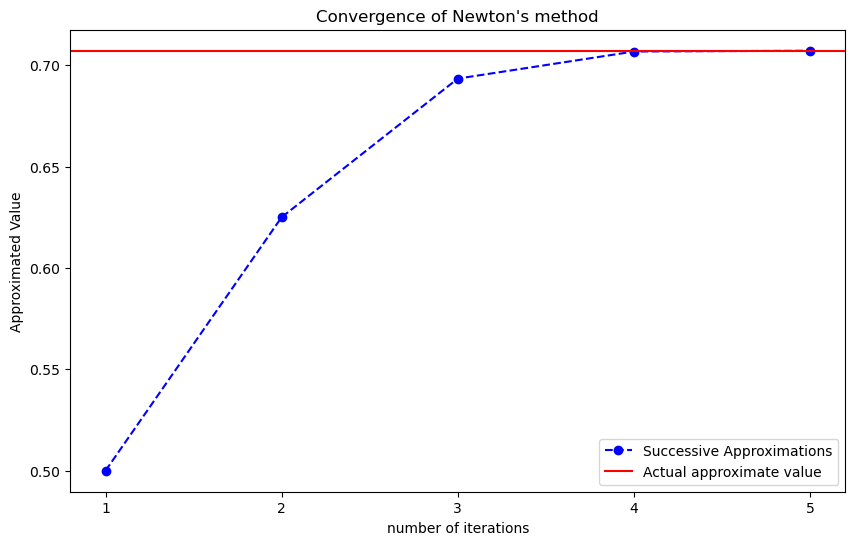

In [8]:
# Set up for the test(i = 2), five iterations
i = 2
initial_guess = 1
max_iterations = 6
results_of_approximation = []

for n in range(1, max_iterations):
    result = newton_method_for_inverse_square_root(i, initial_guess, n)
    results_of_approximation.append(result)

results_of_approximation_np = np.array(results_of_approximation)
results_in_percentage = (results_of_approximation_np / (1 / np.sqrt(2))) * 100

# Printing results
print("Approximation results after each iteration:")
print(results_of_approximation)
print("Approximations as a percentage of the actual value:")
print(results_in_percentage)
# Plotting results
plt.figure(figsize = (10, 6))
plt.plot(range(1,len(results_of_approximation_np)+1), results_of_approximation_np, marker = "o", linestyle = "--", color = "b", label = "Successive Approximations")
actual_value = 1 / np.sqrt(2)
plt.axhline(actual_value, color = "r",  linestyle = "-", label ="Actual approximate value")
plt.xlabel("number of iterations")
plt.ylabel("Approximated Value")
plt.title("Convergence of Newton's method")
plt.xticks(range(1, 6))
plt.legend()
plt.show()

We see that approximations converge on the actual result quite fast - after three iterations our improved guess is already at ninety-eight percent accuracy. This is because the difference between the approximation for successive iterations is essentially squared-it becomes very small, very fast. This is why if the initial guess is very close just one iteration is required.

##### Learning from the past

Improvements in CPU and GPU technology have made the Quake fast inverse square root obsolete in terms of practical usage. However, its story is still fascinating. Furthermore, a lot of insight into problem solving can be gained with the exploration of the brilliant way in which the Quake developers managed to combine clever programming and applied mathematics to find a solution. Maybe the huge success and popularity of the Quake games were at least in small part due to the genius algorithm used for normalization in them.

Having gained insight into the history of normalization for games, let us go back to our main objective and see what we have achieved so far.

#### Back to the Ray tracer: A quick test

Let us show the image to see what it looks like at this point. Once we have done that we are done with the first part of the algorithm and we can move on to defining objects in the scene and looking for intersections. 

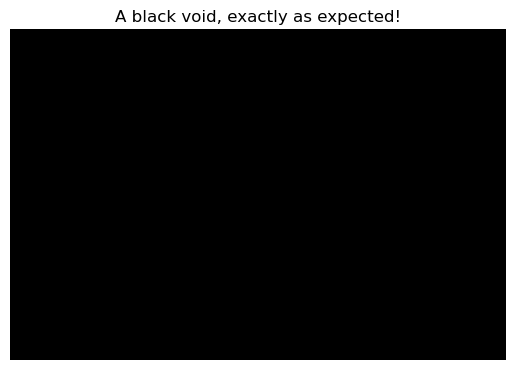

In [9]:
plt.imshow(image)
plt.title("A black void, exactly as expected!")
plt.axis('off')
plt.savefig("test.png", bbox_inches='tight')

#### Defining a sphere

In order to be able to render anything but a blank black image we should add objects to the scene. We will add a sphere first. Luckily the surface of a sphere, which is what we are only concerned with is very easy to define mathematically: it is simply all the points for which the distance to the center of the sphere **C** *(h,k,l)* is equal to the radius **r**. The distance between two points **A** and **B** is the square root of the sum of the squares of the difference between their respective coordinates. If we substitute this formula in the formula derived from the definition of a sphere and square both sides to get rid of the square root we get the equation defining a sphere. As with the magnitude formula domain issues with the square root are not possible.
$$A(x_1, y_1, z_1), B(x_2, y_2, z_2 )$$
$$d_{ab} = \sqrt{(x_2-x_1)^2+(y_2-y_1)^2+(z_2-z_1)^2} $$
$$P(x, y, z), C(h,k,l )$$
$$\sqrt{(x-h)^2+(y-k)^2+(z-l)^2}=r $$
$$(x-h)^2+(y-k)^2+(z-l)^2=r^2 $$
If we shift away from looking at the surface of the sphere and the center as points, and consider them vectors whose terminal points correspond to the points we get:
$$\left\|P-C\right\|^2= r^2$$
where **C** is the center, **r** is the radius and **P** is any point on the surface of the sphere. Now that we have the equation of a sphere we can add a sphere to the scene and start looking for intersections. We will be keeping all objects in the scene in a list in which each object is a dictionary.

In [10]:
# Add a sphere
objects = [{"center":np.array([-0,2, -0.0, -1])}]

### Intersections of a line and a sphere  - Part I

A brief review of what we have done so far:
* we found the direction vector for the light ray passing through each pixel;
* we normalized that direction vector;

We can now move the direction vector to the camera position by adding it to the camera. Then we start "growing" this direction vector. This "growing" is done by multiplying the vector by a **scalar**(number) we will call **t**. While "growing" the vector will pass through the corresponding pixel and enter the scene in front the screen. In the scene, it can intersect objects that lie in its path. In the case of the sphere we added earlier for such an intersection to exist the point that the direction vector reaches when "grown" has to correspond to the point **P** in the sphere equation we derived earlier. From here on, we will call the camera the **start** of the direction vector and signify it with capital **S** to avoid confusion between the camera and the center of the sphere **C**. We will also use capital letters to for everything except the **scalar** **t**.  From all this we derive the following equation where **S** is the start, **D** is the direction vector, **t** is the number we are multiplying with to "grow" the vector, **C** is the center of the sphere and **R** is the radius:
$$\left\|S+tD-C\right\|^2= R^2$$

We should modify the code so it reflects the change in notation.To move further and find intersections we will need to first discuss the Dot Product of two vectors and its properties.

#### Interlude: The Dot Product and its properties

The dot product is an operation defined on vectors that produces a scalar(number) and  is intimately related to both the angle between the vectors and the projection of one vector onto another. The dot product for two vectors can be calculated by adding the products of the corresponding components of the vectors. In our case we are more concerned with the properties of the dot product for now, since we need them to solve the equation for sphere intersection.

The dot product has the following properties:
$$\vec{\textbf v}\cdot\vec{\textbf w}=\vec{\textbf w}\cdot\vec{\textbf v}$$ 
$$\vec{\textbf v}\cdot\left(\vec{\textbf u}+\vec{\textbf w}\right)=\vec{\textbf v}\cdot\vec{\textbf u}+\vec{\textbf v}\cdot\vec{\textbf w}$$
$$\left(t\vec{\textbf v}\right)\cdot\vec{\textbf w}=t\left(\vec{\textbf v}\cdot\vec{\textbf w}\right)=\vec{\textbf v}\cdot\left(t\vec{\textbf w}\right) $$
$$\vec{\textbf 0}\cdot\vec{\textbf v}=0$$
$$\vec{\textbf v}\cdot\vec{\textbf v}=\langle v_1, v_2, v_3 \rangle\cdot\langle v_1, v_2, v_3 \rangle=v_1^2+v_2^2+v_3^2=\left(\sqrt{v_1^2+v_2^2+v_3^2}\right)^2$$

Of these, we will be using the second, which states that the dot product is distributive across addition, the third which states that we can move a scalar anywhere we want and the last one. In the last property the term on the right might seem familiar. Earlier when we derived the formula for the magnitude of a vector we wrote:
$$\left\|\vec{\textbf{p}}\right\| = \sqrt{p_1^2+p_2^2+p_3^2}$$
If we switch the name of the vector $\vec{\textbf p}$ we used before to the $\vec{\textbf v}$ we are using here and write the last property of the dot product again we get:
$$\left\|\vec{\textbf{v}}\right\| = \sqrt{v_1^2+v_2^2+v_3^2}$$
$$\vec{\textbf v}\cdot\vec{\textbf v}=\langle v_1, v_2, v_3 \rangle\cdot\langle v_1, v_2, v_3 \rangle=v_1^2+v_2^2+v_3^2=\left(\sqrt{v_1^2+v_2^2+v_3^2}\right)^2$$
$$\implies\left\|\vec{\textbf{v}}\right\|^2=\vec{\textbf v}\cdot\vec{\textbf v}$$

Interestingly, it turns  out that the dot product of a vector with itself is equal to the square of its magnitude. At first glance this result does not seem very useful, but after some consideration we find out it is very helpful both generally and for us in our quest to find intersections. The general usefulness stems from the fact that one can use this result and the law of cosines for the sides of a triangle, and by altering one's view of the triangle's sides and considering two of them to be vectors and the third one to be the vector difference of the first two, a new formula for the dot product using the angle between the vectors can be derived. This means that if we have the dot product of two vectors we can calculate the angle between them. The usefulness in our specific case is related to the fact that in the equation for the intersection condition we derived we have a term which is a squared magnitude of a vector. We can now substitute this term with the dot product of this vector with itself and simplify and solve the equation.


#### Intersections of a line and a sphere - Part II

Let us get straight to solving the equation:
$$\left\|S+tD-C\right\|^2= R^2$$
$$\left\|\left(S-C\right)+tD \right\|^2=R^2$$
$$\left\|\vec{\textbf{v}}\right\|^2=\vec{\textbf v}\cdot\vec{\textbf v}$$
$$\implies\left(\left(S-C\right)+tD\right)\cdot\left(\left(S-C\right)+tD\right)=R^2$$
Let **L**=**S**-**C**(a vector from the center of the sphere to the start ot the ray)
$$\left(L+tD\right)\cdot\left(L+tD\right)=R^2$$
$$L\cdot L+2t\left(L\cdot D\right)+t^2\left(D\cdot D\right)=R^2$$
Since **D** is a unit vector its magnitude is 1 its magnitude squared is also 1. It follows that the dot product of **D** which is equal to the magnitude squared is one. Here we see how normalization paid of by greatly simplifying our calculations.
$$D\cdot D = \left\|D\right\|^2=1$$
We substitute this in the equation and get:
$$L\cdot L+2t\left(L\cdot D\right)+t^2=R^2$$
If we organize this as a quadratic equation for the *t* variable we get:
$$t^2+2\left(L\cdot D\right)t+\left(L\cdot\ L-R^2\right)=0$$

This is a standard quadratic equation in which we know everything but **t** - the scalar with which we "grow" the direction vector. We can solve this equation to find a value of *t* which produces an intersection if such a value exists.
The general form of the quadratic equation is: $$at^2+bt+c=0$$
Our equation is: $$t^2+2\left(L\cdot D\right)t+\left(L\cdot\ L-R^2\right)=0$$
So for us:
* $a = 1$
* $b = 2\left(L\cdot D \right)$
* $c = L\cdot L - R^2$<br>

We can use the quadratic formula to solve for *t*:
$$t=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$
Substitute the coefficients:
$$t=\frac{-2\left(L\cdot D \right)\pm\sqrt{\left(2\left(L\cdot D \right)\right)^2-4\left(1\right)\left(L\cdot L - R^2\right)}}{2\left(1\right)}$$
$$t=\frac{-2\left(L\cdot D \right)\pm\sqrt{4\left(L\cdot D \right)^2-4\left(L\cdot L - R^2\right)}}{2}$$
$$t=\frac{-2\left(L\cdot D \right)\pm\sqrt{4\left(\left(L\cdot D \right)^2-\left(L\cdot L - R^2\right)\right)}}{2}$$
$$t=\frac{-2\left(L\cdot D \right)\pm2\sqrt{\left(\left(L\cdot D \right)^2-\left(L\cdot L - R^2\right)\right)}}{2}$$
$$t=-\left(L\cdot D \right)\pm\sqrt{\left(\left(L\cdot D \right)^2-\left(L\cdot L - R^2\right)\right)}$$

The discriminant $\Delta$ is:
$$\Delta = \left(\left(L\cdot D \right)^2-\left(L\cdot L - R^2\right)\right)$$
* If $\Delta<0$, there is no real solution and therefore no intersection. 
* If $\Delta=0$, there is one real solution with a multiplicity of two and therefore one intersection(tangent).
* If $\Delta>0$, there are two real solutions and two intersections: one when the ray hits the sphere and another one when it exits on the other side.


![title](intersection_cases.png)

Out of the three possibilities in the image above for us only the third one counts as an intersection. So if the discriminant is less than or equal to zero this means there is no intersection. We will also ignore negative values of **t** since they mean that the unit vector in the opposite direction intersects the sphere, but this intersection would happen not in front of, but behind the screen so we are not concerned with it. We can now write the `sphere_intersect()` function below, it will return positive infinity (**np.inf**) if no intersection is found according to our rules and the scalar for the distance from the start of the ray to the first intersection which is the smaller **t** value out of two positive solutions.

In [11]:
def sphere_intersect(center, radius, ray_start, ray_direction):
    L = ray_start - center
    b = 2 * np.dot(ray_direction, L)
    c = np.dot(L, L) - radius * radius
    delta = b * b - 4 * c
    if delta > 0:
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        if t1 > 0 and t2 > 0:
            return np.min(t1, t2)
    return np.inf

### Let there be red. Our first rendered object

Let's put all the code we wrote so far below and test it a bit. For each pixel we will call the `sphere_intersect()` function and if an intersection exist we will set the color for that pixel to red. The RGB value for the red color is [255, 0, 0] and we can normalize it to a value between zero and one with the `np.clip()` function. 

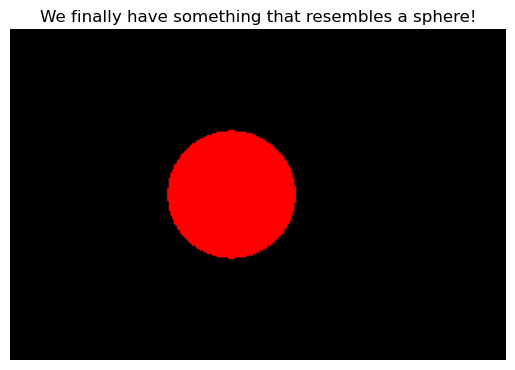

In [12]:
def get_pixel_coordinates(width, height):
    ratio = float(width / height)
    # set up screen tuple with left, top, right and bottom
    screen = (-1, 1 / ratio, 1, -1 / ratio)
    x_coordinates = np.linspace(screen[0], screen[2], width)
    y_coordinates = np.linspace(screen[1], screen[3], height)
    coordinates = (y_coordinates, x_coordinates)
    return coordinates

def normalize(vector):
    unit_vector = vector / np.linalg.norm(vector)
    return unit_vector

def sphere_intersect(center, radius, ray_start, ray_direction):
    L = ray_start - center
    b = 2 * np.dot(ray_direction, L)
    c = np.dot(L, L) - radius * radius
    delta = b * b - 4 * c
    if delta > 0:
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    return np.inf

    
# Set up the scene
camera = np.array([0, 0, 1])
width = 300
height = 200
screen = get_pixel_coordinates(width, height)

image = np.zeros((height, width, 3))

# Objects in the scene
objects = [{"center":np.array([-0,2, 0.0, -1])}]

# ALgorithm skeleton
for i, y in enumerate(screen[0]):
    for j, x in enumerate(screen[1]):
        pixel = np.array([x, y, 0])
        start = camera
        d = pixel - start
        direction = normalize(d)
        intersection = sphere_intersect(np.array([-0.2, -0.0, -1]), 0.5, start, direction)
        if(intersection != np.inf):
            image[i, j]= np.clip([255, 0, 0], 0, 1)
# Save results
plt.imsave("image.png", image)
plt.imshow(image)
plt.axis("off")
plt.title("We finally have something that resembles a sphere!")
plt.savefig("test.png", bbox_inches='tight')

#### Estimating the value of $\Pi$ from the rendered image

What we have essentially done is project a sphere onto 2D space. Since such a projection is a circle we should have something resembling a red circle in front of us. Now if we were to cut a square around the circle as if the circle was inscribed and the circles radius is **r**, then the side of the square would be **2r**. This implies that:
* The area of the square is $As=\left(2r\right)^2$
* The are of the circle is $Ac=\pi r^2$
* The ratio of the area of the circle to the area of the square is $$\frac{Area\circ}{Area\square}=\frac{\pi r^2}{\left(2r\right)^2}=\frac{\pi r^2}{4r^2}=\frac{\pi}{4}$$

We can do all this in **Python** and find the ratio of the red pixels in the image to all the pixels. This ratio should be close to the ratio derived above. If we solve this equation for **$\pi $** by multiplying the  left side by four we will get an approximation of $\pi$.
$$\frac{Red Pixels}{All Pixels}=\frac{\pi}{4}$$
$$\pi=4\frac{Red Pixels}{All Pixels}$$

Let's do it below and see what we get! We will need to write a function to extract to position of the first and last red pixel for each axis(height, width).

(61, 138, 95, 172)


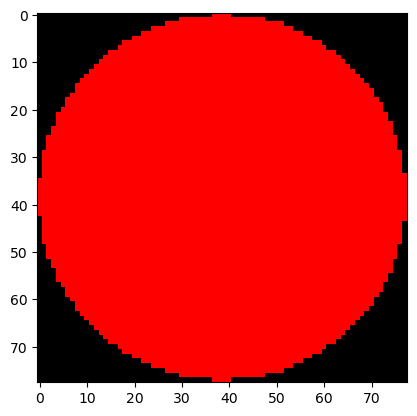

In [13]:
def get_boundary_red_pixels(image):
    # Define red
    red = np.array([1.0, 0.0, 0.0])
    # Find all red pixels
    red_pixels = np.all(image == red, axis = -1)
    # Create arrays of indexes of non-zero elements by axis
    rows, cols = np.where(red_pixels)
    if len(rows) > 0 and len(cols) > 0:
        first_red_row = np.min(rows)
        last_red_row = np.max(rows)
        first_red_col = np.min(cols)
        last_red_col = np.max(cols)
        return (first_red_row, last_red_row, first_red_col, last_red_col)
    else:
        return None

img = image
indexes = get_boundary_red_pixels(img)
print(indexes)

# Cut the square
# The +1 correction for the last indexes is needed to include them
square_cut = image[indexes[0]:indexes[1]+1, indexes[2]:indexes[3]+1]
plt.imshow(square_cut)

In [14]:
# Red color is [1.0, 0.0, 0.0]
def red_pixel_counter(square):
   red = np.array([1.0, 0.0, 0.0])
   red_pixels = np.all(square == red, axis = -1)
   result = np.sum(red_pixels)
   return result

red_pixels = red_pixel_counter(square_cut)
total_pixels = (np.array(square_cut).size) / 3
pi_estimate= 4 * (red_pixels / total_pixels)
print("Our estimate is:                                                                     ", pi_estimate)
pi_estimated_by_1280X720 = 3.141876597298284
print("Running the same code with a resolution of 1280 by 720 pixels produces an estimate of", pi_estimated_by_1280X720)
print("The actual value of r$\Pi$ up to fifteen decimal places is:                          ", np.pi)

Our estimate is:                                                                      3.088757396449704
Running the same code with a resolution of 1280 by 720 pixels produces an estimate of 3.141876597298284
The actual value of r$\Pi$ up to fifteen decimal places is:                           3.141592653589793


We are pretty close. Furthermore, the approximation seems to improve with the increase of resolution as expected. This can serve as a little test: we are of course, still not sure that the code we wrote to project a sphere in 2d produces a circle, but at the very least the area for the figure the code produces is pretty close to that expected of one.

### The end is just the beginning

If we look back at the pseudo code for the ray tracer we will see we are at the last two instructions: calculate color for the intersection point and set color to the pixel. This however is not the end - it is just the beginning. Right now the only part of light's real world behavior that we model is that it travels in a straight line if it stays in the same medium. Out of the many interactions of light with matter: specular reflection, diffuse reflection, refraction, absorption, scattering, diffraction, interference and many others we model none. This is why the sphere in the image looks flat and is indistinguishable from a circle. It is not shaded at all. The last step in the algorithm - calculating the color of the pixel will become more and more complex as we try to model more light phenomena and strive to make the rendered image more realistic. The more information we generate for the pixel, the better results will we get. Let us start with shading.

#### Shading and surface normals

Shading tries to approximate local behavior of light on the surface of an object and is different from techniques for adding shadows which are related to the global behavior of light. There are many approaches to shading. We will be using a basic one in which surface normals are used to shade the object.

In the case of spheres the term normal refers to the vector perpendicular to the surface tangent at point **P(x, y, z)**. If one knows the coordinates of this point **P** and the coordinates of the circle center **C**, the normal can be computed easily by subtracting the center coordinates from the point **P** coordinates. This will give us the position vector for $\vec{CP}$ and is analogous to how we found the direction vector for each pixel earlier.
$$Normal = Point - Center$$
$$\vec{n}=P(x, y, z)-C(h, k, l)$$
$$\vec{n}=\langle x -h, y-k, z-l \rangle $$

In our case, we already know the coordinates of the center **C** and the  coordinates **P** are the intersection of the ray through each pixel and the sphere. They are equal to the camera(start) + **t** times the direction vector **D** where **t** is the value returned by the `sphere_intersect()` function. Again we should normalize this vector to make it easier to work with. With this in mind let's write the `get_surface_normal()` function. We should accept a parameter **object** which will allow us to be more flexible. Later we might need to add a different type of object the normal for which could be calculated in a different way.


![title](surface_normal.png)

In [15]:
def get_surface_normal(object, ray_start, ray_direction,t,center):
    if object == "sphere":
        intersection_point = ray_start + (t * ray_direction)
        surface_normal = normalize(intersection_point - center)
    return surface_normal

Now we can add a function which uses the surface normal to return a color for the pixel. We will return a color equal to 0.5 times the sum between the normal and one. This will get rid of negative values and normalize the value of the color between zero and one.
$$Color = 0.5(surface\_normal+1)$$

In [16]:
def get_object_pixel_color(surface_normal):
    color = 0.5*(surface_normal + 1)
    return color

Let's also add a function that colors the background of the image. We will use a blue to white gradient based on the **y** coordinate. We will basically create a mix of blue and white for the color, the closer **y** is to the bottom of the screen the more blue will we use in the mix and conversely if **y** is closer to the top we will use more white.
We will use the following formula to normalize the value of **z** to the range [0, 1]:
$$normalizedY=\frac{(y - screen\_bottom)}{(screen\_top - screen\_bottom)}$$
And the following formula to compute the color:
$$Color = blue(1 - normalizedY) + white(normalizedY)$$

In [17]:
def get_gradient_color(y, screen_top, screen_bottom):
    # Normalize y to the range [0, 1]
    normalized_y = (y - screen_bottom) / (screen_top - screen_bottom)
    # Compute the color as a mix between blue and white
    blue = np.array([0, 0, 1])
    white = np.array([1, 1, 1])
    color = blue * (1 - normalized_y) + white * normalized_y
    return np.clip(color, 0, 1)


We can now put everything together below:

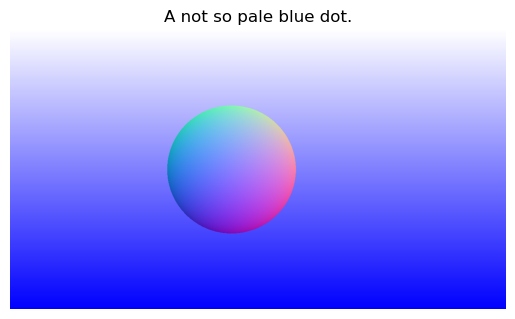

In [18]:
def get_pixel_coordinates(width, height):
    ratio = float(width / height)
    # set up screen tuple with left, top, right and bottom
    screen = (-1, 1 / ratio, 1, -1 / ratio)
    x_coordinates = np.linspace(screen[0], screen[2], width)
    y_coordinates = np.linspace(screen[1], screen[3], height)
    coordinates = (y_coordinates, x_coordinates)
    return coordinates

def normalize(vector):
    unit_vector = vector / np.linalg.norm(vector)
    return unit_vector

def sphere_intersect(center, radius, ray_start, ray_direction):
    L = ray_start - center
    b = 2 * np.dot(ray_direction, L)
    c = np.dot(L, L) - radius * radius
    delta = b * b - 4 * c
    if delta > 0:
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    return np.inf

def get_surface_normal(object, ray_start, ray_direction,t,center):
    if object == "sphere":
        intersection_point = ray_start + (t * ray_direction)
        surface_normal = normalize(intersection_point - center)
    return surface_normal

def get_object_pixel_color(surface_normal):
    color = 0.5*(surface_normal + 1)
    return color

def get_gradient_color(y, screen_top, screen_bottom):
    # Normalize y to the range [0, 1]
    normalized_y = (y - screen_bottom) / (screen_top - screen_bottom)
    # Compute the color as a mix between blue and white
    blue = np.array([0, 0, 1])
    white = np.array([1, 1, 1])
    color = blue * (1 - normalized_y) + white * normalized_y
    return np.clip(color, 0, 1)

    
# Set up the scene
camera = np.array([0, 0, 1])
width = 1280
height = 720
screen = get_pixel_coordinates(width, height)

image = np.zeros((height, width, 3))

# Objects in the scene
objects = [{"center":np.array([-0,2, 0.0, -1])}]

# ALgorithm skeleton
for i, y in enumerate(screen[0]):
    for j, x in enumerate(screen[1]):
        pixel = np.array([x, y, 0])
        start = camera
        d = pixel - start
        direction = normalize(d)
        inter = sphere_intersect(np.array([-0.2, -0.0, -1]), 0.5, start, direction)
        color = None
        if(inter != np.inf):
            color = get_object_pixel_color(get_surface_normal("sphere", start, direction, inter, np.array([-0.2, -0.0, -1])))
        else:
            color = get_gradient_color(y,screen[0][0], screen[0][-1])
        image[i, j]= color
            
    
# Save results
plt.imsave("image.png", image)
plt.imshow(image)
plt.axis("off")
plt.title("A not so pale blue dot.")
plt.savefig("output.png", bbox_inches='tight')

### What is next? Possible improvements

This implementation of a ray tracing algorithm is quite basic and very many improvements are possible. We will list some of them bellow:

*   Adding a light source and shadows
*   Adding specular reflection and diffuse reflection
*   Adding Dielectrics
*   Adding additional types of objects to the scene
*   Adding camera movement and rotation
*   Experimenting with more simple shading techniques
*   Implementing the Perlin noise algorithm to get good looking solid textures. 

We will be implementing some of these below.


#### Adding more objects. Planes and Plane Intersections

So far we have only added a single sphere to the scene we are rendering. Next we will be adding planes. Let us see how we can define a plane and look for intersections with it.

Given a point lying on the plane $P_0(x_0, y_0, z_0)$ and a normal(orthogonal) vector to the plane $\vec{n} \langle a, b , c \rangle$ we can define a specific plane. To determine if another point $P(x, y, z)$ is in the plane we check whether the vector $\vec{P_0P}$ with initial point $P_0$ and terminal point $P$ is orthogonal to the plane normal. To check if two vectors are orthogonal we only need to calculate their dot product and see if it equals zero. If $r_0$ and $r$ are the position vectors corresponding to $P_0$ and $P$ respectively then the vector $\vec{P_0P}$ is represented by $r-r_0$. Then the plane is defined by the tips of the vectors $r$ which satisfy the equation:
$$n.\left(r-r_0\right)= 0$$
This is the vector equation of the plane. If we write $n$ in its component form $\vec{n} \langle a, b , c \rangle$ and let $r_0=\langle x_0, y_0, z_0 \rangle$ the equation becomes:
$$\langle a, b , c \rangle\cdot \langle x-x_0, y-y_0, z-z_0  \rangle$$
Now when we perform the dot product we get the following equation of the plane the uses the variables $x$, $y$, $z$, the coordinates of the point for which we want to check it it is in the plane:
$$a(x-x_0)+b(y-y_0)+c(z-z_0)=0$$
We can generalize this to the following form where N is the normal, $P$ is the point known to be in the plane and $X$ is the point we want to check:
$$\left( X_{xyz}-P_{x_0y_0z_0}\right)\cdot N=0$$
As we already know from the section on intersections of a line and the sphere the light ray through each pixel can be defined as $Ray= S+tD$ where $S$ is its starting point(the camera), $D$ is the direction vector for the specific pixel and t is a scalar. Analogously to how we were looking for sphere intersections we can substitute the ray equation into the equation of the plane and solve for $t$. 
$$Ray= S+tD$$
$$\left( X-P\right)\cdot N=0$$
$$\left( Ray-P\right)\cdot N=0$$
$$\left( S+tD-P\right)\cdot N=0$$
$$\left(\left(-P+ S\right)+tD\right)\cdot N=0$$
$$N\cdot\left(-P+ S\right)+N\cdot tD=0$$
$$N\cdot tD=-N\cdot\left(-P+ S\right)$$
$$N\cdot tD=N\cdot\left(P- S\right)$$
$$t=\frac{N\cdot\left(P- S\right)}{N\cdot D}$$

We are now ready to implement a function checking for intersections with a plane and returning the distance to the them if they exist. We should first calculate the dot product of the direction vector through the pixel and the plane normal. If this dot product is zero that means the direction vector and the normal are orthogonal. In such a case, the direction vector and the plane are both orthogonal to the normal, which  if Euclid is to be trusted(something that has come into question in the last few centuries) means they are parallel. If they are parallel no intersection between them can exist and we will return plus infinity as the distance $t$. Mathematically another possibility exists, namely that the ray lies entirely within the plane, however the projection of this case on the screen would not be a plane, so this case is of no practical use to us and we will ignore it.  Additionally, if the dot product is not zero but is within a very small predefined constant of zero, we will also treat the vectors as orthogonal. The constant we will use is  1e-6. This is done for a couple of reasons: first, the limitations in numerical precision in floating point arithmetic and second, to avoid working with very small numbers in the denominator when calculating the distance to the intersection $t$. If the direction vector and the normal are not orthogonal, we can calculate the distance $t$ with the formula we derived. Because we check if the dot product is zero earlier we cannot get a division by zero error. Negative $t$ values, just like in the case of spheres, indicate that the intersection lies behind the ray's start, so we will ignore them.

In [19]:
def plane_intersect(known_point, normal, ray_start, ray_direction):
    denominator = np.dot(ray_direction, normal)
    if np.abs(denominator) < 1e-6:
        return np.inf
    t = np.dot(known_point - ray_start, normal) / denominator
    if t < 0:
        return np.inf
    return t

##### Defining Fake planes

We know that the Earth is spherical in shape, yet from our viewpoint very close to its surface this fact is hard to notice. If we ignore some local irregularities like hills and mountains the surface of the Earth looks to us like a plane. This has some practical implications for the task of defining a plane in a ray tracing algorithm. It turns out we could have saved some work. Instead of defining a plane, we could have achieved a similar result by adding a very large (relative to the screen) sphere to the scene. However, adding a real plane is still interesting not only because of the mathematics behind it, but also because it will force as to implement the code in such a way that it handles different objects in the scene appropriately.

#### Keeping track of and adding more objects to the scene

We need a way to keep track of all the objects in the scene. We will use a list of dictionaries. Each entry in the list will be an object in the scene. We will keep the information on the object we need in the dictionary for it. When we have more than one object in the scene to check for intersections we will need to iterate over the list of objects. Let's write auxiliary functions for adding sphere's and planes to the scene below. 

In [20]:
def add_sphere(center, radius):
    return dict(type = "sphere", center = np.array(center) , radius = np.array(radius))

def add_plane(known_point, normal):
    return dict(type = "plane", known_point = np.array(known_point), normal = np.array(normal))

Since intersections with spheres and planes are found differently we also need a function to check the type of object during the iteration over the objects in the scene and apply the appropriate function to look for intersections. It should accept the start of the light ray, its direction and the object we are checking for intersections.


In [21]:
def intersect(ray_start, ray_direction, obj):
    if obj["type"] == "sphere":
        return sphere_intersect(obj["center"], obj["radius"], ray_start, ray_direction)
    elif obj["type"] == "plane":
        return plane_intersect( obj["known_point"], obj["normal"], ray_start, ray_direction)

#### Adding a light source and shadows

Up to now, the algorithm we implemented assumes that the objects we are rendering are lit from all directions. Furthermore, since we had a single sphere in the scene no shadows could exist: there is nothing else to cast a shadow on the sphere or conversely for the sphere to cast a shadow on. Implementing a light source and shadows requires changing these assumptions. Luckily, that is not hard.

We will model the light source as a single point in $\mathbb{R}^3$. This has some disadvantages, however we will discuss them later. To implement shadows we need to change a few things. In the main loop where we access each pixel if we find an intersection of the light ray through a pixel with an object in the scene, before coloring the corresponding pixel we need to check if the intersection we found is lit. This boils down to finding if the intersection point has a direct line of sight of the light source. To do this we cast another ray from the intersection point towards the light source. This secondary ray is often called shadow ray. If no intersections are found on the way this means no object in the scene stands between the intersection point and the light source. In such a case we simply color the corresponding pixel just like before. However, if we find an intersection, the light source is obscured and a shadow is cast. Then we will color the corresponding pixel darker to account for the shadow. The darker color can be obtained by multiplying the original color by $0.5$ - halving the color values and bringing them closer to zero.  There is another important detail: when we cast the ray from the intersection point we need to avoid intersecting the object the starting point is on. This is usually done by introducing a small correction, a step back and away from the object we are on usually in the direction of the surface normal. With all this in mind let's write the `cast_shadow_ray()` function.

In [22]:
def cast_shadow_ray(intersection_point, surface_normal, correction_step, light_source, scene):
    start = intersection_point + correction_step * surface_normal
    direction = normalize(light_source - start)
    for obj in scene:
        if intersect(start, direction, obj) != np.inf:
            return True
    return False

### Putting everything together

Let's add the improvements we made. Now that we have more than one object in the scene we should change the logic of a the algorithm a bit. We will be interested not in any intersections, but only with the ones with the nearest object in the scene. Even if an intersection with another object further away and the light ray through each pixel exists it does not concern us since such an object would be obscured by the nearest one from our point of view(or at least the intersection point with it would be). We will track the nearest object in the **nearest_object** variable and the nearest intersection with **nearest_t**. We should also modify the code to account for more than one object in the scene, for example the `get_surface_normal()` function, it needs to be updated to return the corresponding normals for spheres and planes. We will also add docstrings to the functions we wrote.

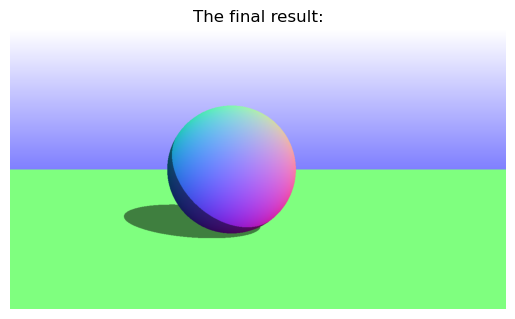

In [23]:
def get_pixel_coordinates(width, height):
    """
    Calculate the pixel coordinates for the screen base on the given resolution.

    Parameters:
    width(int):The width of the screen
    height(int):The height of the screen

    Returns:
    tuple: Two arrays, the first containing the Y coordinates and the second containing the X coordinates. 
    """
    ratio = float(width) / height
    screen = (-1, 1 / ratio, 1, -1 / ratio)
    x_coordinates = np.linspace(screen[0], screen[2], width)
    y_coordinates = np.linspace(screen[1], screen[3], height)
    coordinates = (y_coordinates, x_coordinates)
    return coordinates

def normalize(vector):
    """
    Normalize a vector to have a magnitude of one.

    Parameters:
    vector (ndarray): The input vector to be normalized.

    Returns:
    ndarray: The normalized unit vector.
    """
    unit_vector = vector / np.linalg.norm(vector)
    return unit_vector

def intersect(ray_start, ray_direction, obj):
    """
    Determine the intersection of a ray with an object in the scene.

    Parameters:
    ray_start (ndarray): The initial point of the ray (3D point).
    ray_direction (ndarray): The normalized direction vector of the ray.
    obj (dict): The object to check for intersection, containing its type and relevant parameters.

    Returns:
    float: The distance to the intersection point, or np.inf if no intersection is found.
    """
    if obj["type"] == "sphere":
        return sphere_intersect(obj["center"], obj["radius"], ray_start, ray_direction)
    elif obj["type"] == "plane":
        return plane_intersect(obj["known_point"], obj["normal"], ray_start, ray_direction)
    
def sphere_intersect(center, radius, ray_start, ray_direction):
    """
    Calculate the intersection of a ray with a sphere.

    Parameters:
    center (ndarray): The center of the sphere(3D point).
    radius (float): The radius of the sphere.
    ray_start (ndarray): The initial point of the ray (3D point).
    ray_direction (ndarray): The normalized direction vector of the ray.

    Returns:
    float: The distance to the intersection point, or np.inf if no intersection is found.
    """
    L = ray_start - center
    b = 2 * np.dot(ray_direction, L)
    c = np.dot(L, L) - radius * radius
    delta = b * b - 4 * c
    if delta > 0:
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    return np.inf

def plane_intersect(known_point, normal, ray_start, ray_direction):
    """
    Calculate the intersection of a ray with a plane.

    Parameters:
    known_point(ndarray): A known point on the plane (3D point).
    normal (ndarray): THe normal vector of the plane.
    ray_start (ndarray): The initial point of the ray (3D point).
    ray_direction (ndarray): The normalized direction vector of the ray.

    Returns:
    float: The distance to the intersection point, or np.inf if no intersection is found.
    """
    denominator = np.dot(ray_direction, normal)
    if np.abs(denominator) < 1e-6:
        return np.inf
    t = np.dot(known_point - ray_start, normal) / denominator
    if t < 0 :
        return np.inf
    return t

def add_sphere(center, radius):
    """
    Create a sphere object.

    Parameters:
    center (list of floats or ndarray): The center of the sphere (3D Point)
    radius (float): The radius of the sphere.

    Returns:
    dict: A dictionary representing the sphere object.

    """
    return dict(type = "sphere", center = np.array(center), radius = np.array(radius))

def add_plane(known_point, normal):
    """
    Create a plane object.

    Parameters:
    known_point(list or ndarray): A known point on the plane (3D point)
    normal (list or ndarray): The normal vector of the plane.

    Returns:
    dict: A dictionary representing the plane object.
    """
    return dict(type = "plane", known_point = np.array(known_point), normal = np.array(normal))

def get_surface_normal(obj, intersection_point):
    """
    Calculate the surface normal at the intersection point for a given object.

    Parameters:
    obj (dict): The object for which to calculate the surface normal.
    intersection_point (ndarray): The point of intersection (3D point).

    Returns:
    ndarray: The normalized surface normal vector.
    """
    if obj["type"] == "sphere":
        return normalize(intersection_point - obj["center"])
    elif obj["type"] == "plane":
        return obj["normal"]
    
def cast_shadow_ray(intersection_point, surface_normal, correction_step, light_source, scene):
    """
    Determine if an intersection point is in shadow.

    Parameters:
    intersection_point (ndarray): The point of intersection (3D point).
    surface_normal (ndarray): The surface normal vector at the intersection point.
    correction_step (float): A small correction constant.
    light_source (ndarray): The position of the light source (3D point).
    scene (list): A list of objects in the scene (dictionaries).

    Returns:
    bool: True if the intersection is shadowed, False otherwise.
    """
    start = intersection_point + correction_step * surface_normal
    direction = normalize(light_source - start)
    for obj in scene:
        if intersect(start, direction, obj) != np.inf:
            return True
    return False

def get_object_pixel_color(surface_normal):
    """
    Calculate the color of a pixel based on the surface normal at the intersection point.

    Parameters:
    surface_normal (ndarray): The normalized surface normal vector.

    Returns:
    ndarray: The color of the pixel as an array.
    """
    color = 0.5 * (surface_normal + 1)
    return np.clip(color, 0, 1)

def get_gradient_color(y, screen_top, screen_bottom):
    """
    Calculate the gradient color for a background pixel.

    Parameters:
    y (float): The y-coordinate of the pixel.
    screen_top (float): The y-coordinate of the top of the screen.
    screen_bottom (float): The y-coordinate of the bottom of the screen.
    """
    # Normalize y to the range [0, 1]
    normalized_y = (y - screen_bottom) / (screen_top-screen_bottom)
    # compute the color as a mix between blue and white
    blue = np.array([0, 0, 1])
    white = np.array([1, 1, 1])
    color = blue * (1 - normalized_y)+ white * normalized_y
    return np.clip(color, 0, 1)

# Set up the scene
camera = np.array([0, 0, 1])
width = 1280
height = 720
screen = get_pixel_coordinates(width, height)

image = np.zeros((height, width, 3))

# Add objects to the scene
scene = [ add_sphere([-0.2, -0.0, -1], 0.5),
         add_plane([0.0, -0.5, -1], [0, 1, 0])]

# Add light source
light_source = np.array([5.0, 5.0, 5.0])

# Iterate over pixels
for i, y in enumerate(screen[0]):
    for j, x in enumerate(screen[1]):
        pixel = np.array([x, y, 0])
        start = camera
        direction = normalize(pixel - start)
        nearest_t = np.inf
        nearest_object = None

        # Iterate over objects in the scene
        for obj in scene:
            t = intersect(start, direction, obj)
            if  t < nearest_t:
                nearest_t = t
                nearest_object = obj
        
        # If intersection with an object exists
        if nearest_t != np.inf:
            intersection_point = start + nearest_t * direction
            surface_normal =  get_surface_normal(nearest_object, intersection_point)
            correction_step = 1e-5
            # Check if intersection point is shadowed
            shadowed = cast_shadow_ray(intersection_point, surface_normal, correction_step, light_source, scene)
            if shadowed:
                # In shadow, so darker
                color = get_object_pixel_color(surface_normal) * 0.5
            else:
                color = get_object_pixel_color(surface_normal)
        # No intersection so color background with gradient color
        else :
            color = get_gradient_color(y, screen[0][0], screen[0][-1])
        
        # Set pixel color
        image[i, j] = color

# Save and show result
plt.imsave("image.png", image)
plt.imshow(image)
plt.axis("off")
plt.title("The final result:")
plt.savefig("result.png", bbox_inches =  "tight")
plt.show()

#### Disadvantages of modeling the light source as a single point

In the final rendered image the shadow we got is a bit "sharp". This is because we model the light source as a single point in $\mathbb{R}^3$. In the real world light from the Sun comes from many points in space which is why shadows are more complex. Anyone who has been lucky enough to experience a total solar eclipse and catch good weather for it will have an intuitive understanding of this. In the final moments before totality, as the Moon obscures more and more of the Sun, the light from the Sun reaches us from fewer and fewer points in space and the shadows around grow "sharper" much like the shadow in the rendered image. To get more realistic shadows we can model light as a disc or possibly a sphere. We can add this to the list of possible improvements we compiled earlier. 

### Algorithmic complexity of our implementation

Let us analyze the complexity of the algorithm we wrote. For simplicity we will look at the case in which we are rendering only spheres. Essentially, for each pixel in the image we are casting a ray and checking for intersections for each object in the scene. The number of pixels depend quadratically on the resolution since they are equal to the width times the height. So if we denote the width of the image with **W** and the height with **H** the number of pixels is $W\times H$. Then, the total number of operations is  $W\times H \times N$ where **N** is the number of objects in the scene.
$$Complexity =W\times H \times N$$
In our case each operation is solving a quadratic equation to check for intersections, so we are solving $W\times H \times N$ quadratic equations. This implementation also casts shadow rays to render shadows. So for each intersection point found, a shadow ray is cast and it has to be checked for intersections against all the objects of the scene. This effectively doubles the number of equations to solve, but the overall complexity remains of the same order. 
Overall the number of operations performed to render the image only depends on the resolution chosen and the number of objects in the scene and does not grow very fast. However, as we have already discussed this implementation is quite basic and does not model many behaviors of light which is required to achieve a more realistic image. In a better implementation which accounts for more optical phenomenon the overall complexity would be quite different.

### Added complexity of implementations with real applications

Some of the factors which contribute to the increase in complexity of a ray tracing algorithm designed for use in real applications are:
*   Rendering many different object types in the scene and not only spheres. Spheres are easy to define and work with, but other objects with more complex geometries will be trickier to define and might require more complex calculations to check for intersections;
*   Often to achieve effects like anti-aliasing, motion blur and others not one,but multiple rays are cast through each pixel;
*   To achieve realistic reflections which is one of the strengths of the ray tracing approach, secondary rays are cast recursively because they must be bounced of successive surfaces to calculate the contribution of each bounce to the color of the pixel. This leads to exponential increase in complexity;
*   For more realistic lighting of the scene, many additional rays casts and bounces are required. For example, in path tracing, which is a related algorithm rays are bounced until they hit a light source. This greatly increases complexity;
*   Rendering higher resolutions requires more pixels to be iterated, increasing the computational load.
*   Simulating physical phenomena such as scattering, diffusion and absorption requires additional computations for each ray.


### Current Limitations for Ray Tracing in real time and possible future developments

Ray tracing on the CPU has been used with great success in generating realistic and beautiful images. A good example are the animated movies by the company Pixar in some of which the ray tracing approach was used to improve certain features of the animations. Rendering on the CPU, however can be quite slow and reportedly Pixar needed many days to render a single frame of their movies.
Ray tracing done on the GPU is much faster but still not currently fast enough to render complicated and realistic scenes in real time. The real limitation is the speed required. A modern game for example is typically run at high resolutions and frame rate. To use only ray tracing for such a case would require the calculations we discussed in the complexity sections to be performed for millions of pixels many many times each second. This is not currently feasible. As a solution, hybrid approaches are used. Most of the scene is rendered using other methods and ray tracing is used only on certain features of the scene.
GPU technology, however, is advancing and also more and more software tools come with built in ray tracing capabilities. In some, hopefully not too distant future one could imagine a GPU where the calculations for each pixel is done on a separate GPU core. As I was preparing this presentation I encountered the phrase "Ray tracing is not slow, it is the hardware that is not fast enough!". This might just turn out to be true.

### **Acknowledgements**

*   This presentation was inspired by an article by **Omar Aflak** published on **medium.com**. This is a [link](https://omaraflak.medium.com/ray-tracing-from-scratch-in-python-41670e6a96f9) to the article.
*   This presentation was prepared as a final project for the course **Math concepts for developers** organized by **SoftUni** and taught by **Yordan Darakchiev**. This a  [link](https://softuni.bg/) to the website for SoftUni

Resources used by the author:

Mathematics for Ray Tracing:
*   **Elementary Linear Algebra: Applications Version** by **Howard Anton** ISBN-10:0470432055. Especially chapter 3 which deals with vectors, vector addition, scalar multiplication, dot product and cross product.
*   The first seven videos in the Calculus 3 playlist of the **Professor Leonard** youtube channel. These videos cover vectors in $\mathbb{R}^3$, vector addition, scalar multiplication, dot product, cross product, defining lines, planes and spheres in $\mathbb{R}^3$. This is a [link](https://www.youtube.com/@ProfessorLeonard/) to the channel .
*   The video series **The Essence of Linear Algebra** on the **3Blue1Brown** youtube channel. The playlist can be found [here](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab).
*   **PreCalculus Metric Version** seventh edition by **James Stewart**. This was used for the section on defining planes and plane intersections. The relevant information can be found at the end of chapter 9 - Vectors in two and three dimensions. 

Mathematics for the Newton Method
*   A small section on Newton's method can be found in **Calculus Metric Version Early Transcendentals** 9th edition by **James Stewart**  ISBN-10: 0357113519. It is in section 4 Applications of differentiation.
*   **Paul's Online Notes** on Newton's method. They can be found [here](https://tutorial.math.lamar.edu/classes/calci/newtonsmethod.aspx).

Ray Tracing resources:
*   The **Ray Tracing in One Weekend Series** by  **Peter Shirley**, Trevor David Black, Steve Hollasch. The series can be found [here](https://raytracing.github.io). Spoiler: for a beginner these take much more than one weekend, but are a fantastic resource.
*   Various articles on computer graphics published on **scratchapixel.com**. This is a [link](https://www.scratchapixel.com/index.html) to the website.

The quake fast inverse square root:
*   A great article published on **betterexplained.com**. The article can be found [here](https://betterexplained.com/articles/understanding-quakes-fast-inverse-square-root/).
*   A fantastic youtube video on the channel **Nemean**. The video can be found [here](https://www.youtube.com/watch?v=p8u_k2LIZyo).
*   A scientific paper on the algorithm by **Chris Lomont**. The paper can be found [here](https://www.lomont.org/papers/2003/InvSqrt.pdf). 

All the images used in this presentation are generated with code written by the author. The following resources were used to write that code.
* A topic on the website stackoverflow.com on plotting a 3D cube, sphere and a vector.This is a [link](https://stackoverflow.com/questions/11140163/plotting-a-3d-cube-a-sphere-and-a-vector) to the topic.
* A more general resource on 3D plotting can be found in an excerpt from the **Python Data Science Handbook** by **Jake VanderPlas** [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html).
